## Assignment 1a)

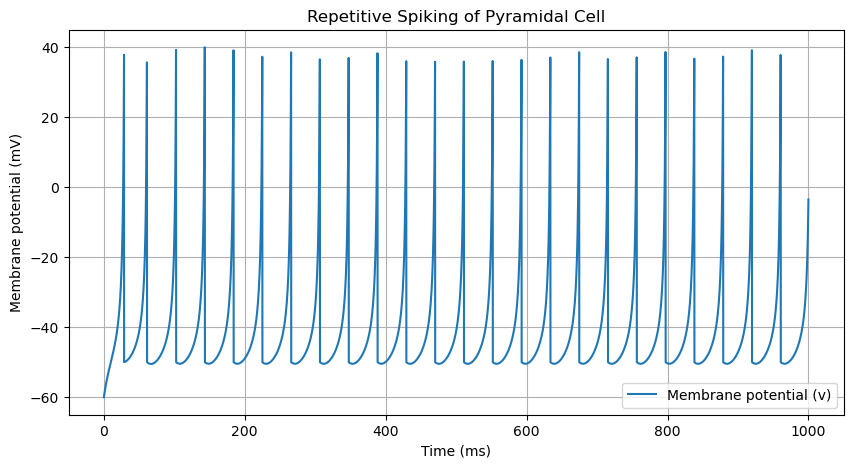

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
dt = 0.1  # Time step (ms)
T = 1000  # Total simulation time (ms)
time = np.arange(0, T, dt)

# Model parameters
I = 150  # Input current
v_reset = -50  # Reset voltage after spike
u_reset_increment = 100  # Increment of u after spike
v_threshold = 35  # Threshold for spike
v = -60  # Initial membrane potential
u = 0  # Initial recovery variable

# Storage for results
v_trace = []
u_trace = []

# Simulation loop using the modified Euler method
for t in time:
    # Save current values
    v_trace.append(v)
    u_trace.append(u)
    
    # Check for spike
    if v > 35:
        v = v_reset  # Reset voltage
        u += u_reset_increment  # Increase recovery variable
    else:
        # Update v and u using Euler's method
        dv = (0.7 * (v + 60) * (v + 40) - u + I) / 100
        du = 0.03 * (-2 * (v + 60) - u)
        v += dv * dt
        u += du * dt

# Plotting the repetitive spiking behavior
plt.figure(figsize=(10, 5))
plt.plot(time, v_trace, label="Membrane potential (v)")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane potential (mV)")
plt.title("Repetitive Spiking of Pyramidal Cell")
plt.legend()
plt.grid()
plt.show()



## Assignment 1b)

### For what values does the neuron spike?

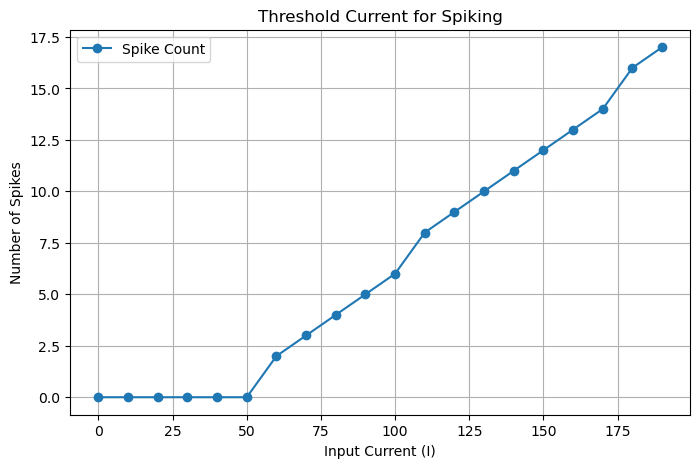

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate the model for a given I
def simulate(I, dt=0.1, T=1000):
    n_steps = int(T / dt)
    v = -65
    u = 0
    v_values, u_values, spikes = [], [], 0
    time = np.arange(0, T, dt)

    for t in time:
        v_values.append(v)
        u_values.append(u)

        dv = (0.7 * (v + 60) * (v + 40) - u + I) / 100
        du = 0.03 * (-2 * (v + 60) - u)

        v_pred = v + dv * dt
        u_pred = u + du * dt

        dv_pred = (0.7 * (v_pred + 60) * (v_pred + 40) - u_pred + I) / 100
        du_pred = 0.03 * (-2 * (v_pred + 60) - u_pred)

        v += (dv + dv_pred) / 2 * dt
        u += (du + du_pred) / 2 * dt

        if v > 35:
            v = -50
            u += 100
            spikes += 1

    return time, v_values, u_values, spikes

# Parameter sweep for I
I_values = np.arange(0, 200, 10)  # Test input currents
spike_counts = []

for I in I_values:
    _, _, _, spikes = simulate(I, T=500)
    spike_counts.append(spikes)

# Plotting spikes as a function of I
plt.figure(figsize=(8, 5))
plt.plot(I_values, spike_counts, marker='o', label="Spike Count")
plt.xlabel('Input Current (I)')
plt.ylabel('Number of Spikes')
plt.title('Threshold Current for Spiking')
plt.legend()
plt.grid()
plt.show()



So the neuron spikes for an input current of 50.

### The bifurcation at the onset of spiking

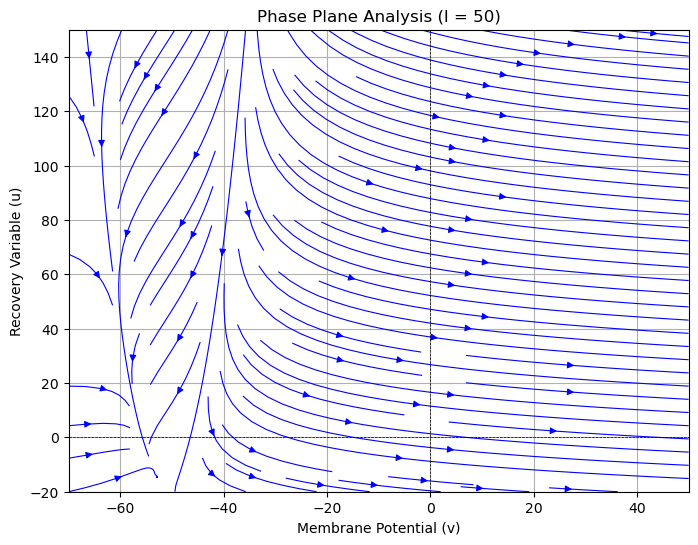

In [24]:
def phase_plane(I, v_range=np.linspace(-70, 50, 100), u_range=np.linspace(-20, 150, 100)):
    v, u = np.meshgrid(v_range, u_range)
    dv = (0.7 * (v + 60) * (v + 40) - u + I) / 100
    du = 0.03 * (-2 * (v + 60) - u)

    plt.figure(figsize=(8, 6))
    plt.streamplot(v, u, dv, du, density=1.2, color='blue', linewidth=0.8)
    plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
    plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
    plt.title(f'Phase Plane Analysis (I = {I})')
    plt.xlabel('Membrane Potential (v)')
    plt.ylabel('Recovery Variable (u)')
    plt.grid()
    plt.show()

# Test for specific I
phase_plane(I=50)


### How does the firing rate vary with I?

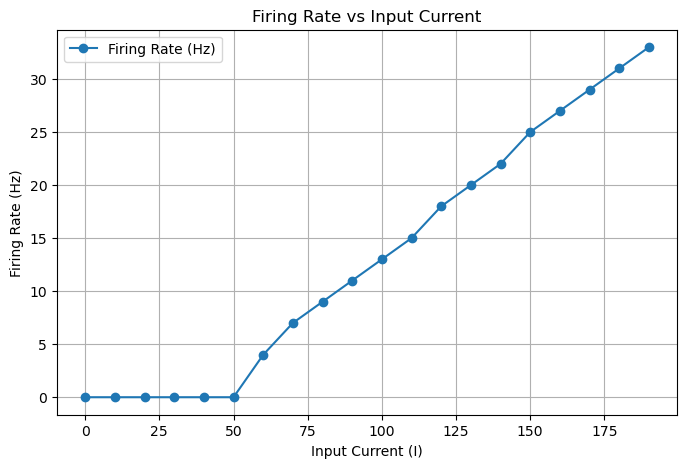

In [25]:
firing_rates = []

for I in I_values:
    _, _, _, spikes = simulate(I, T=1000)
    firing_rates.append(spikes)

# Plot firing rate vs I
plt.figure(figsize=(8, 5))
plt.plot(I_values, firing_rates, marker='o', label='Firing Rate (Hz)')
plt.xlabel('Input Current (I)')
plt.ylabel('Firing Rate (Hz)')
plt.title('Firing Rate vs Input Current')
plt.legend()
plt.grid()
plt.show()


### What type of spiking behavior does this neuron show?

Based on the dynamics, the neuron likely exhibits regular spiking behavior:
- The spiking behavior is periodic and depends on I, typical for pyramidal cells. 
- The firing rate smoothly increases with I, which is characteristic of type I spiking neurons.

## Assignment 1c and 1d)

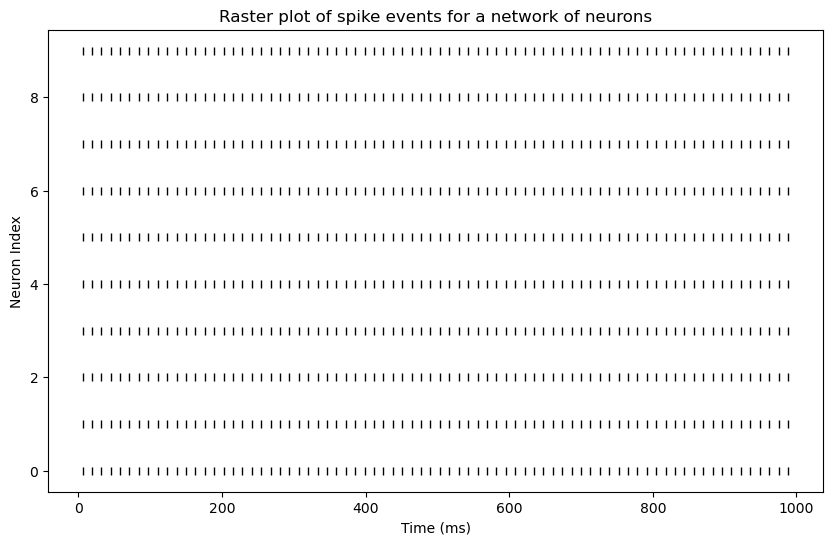

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 10  # Number of neurons
I = 100  # Input current for each neuron (can be adjusted)
duration = 1000  # Total simulation time (ms)
dt = 0.1  # Time step (ms)
time_steps = int(duration / dt)

# Neuron model parameters
a = 0.03
b = -2
c = -50
d = 100

# Connection matrix (random example)
C = np.random.rand(N, N)  # Random coupling matrix, can be set according to desired connectivity

# Initial conditions
v = np.full(N, -60)  # Initial membrane potential for all neurons
u = np.full(N, -20)  # Initial recovery variable for all neurons
spikes = np.zeros((N, time_steps))  # Spike train for all neurons

# Function to simulate neuron dynamics
def simulate_network():
    global v, u, spikes
    for t in range(1, time_steps):
        for i in range(N):
            # Synaptic current contribution from other neurons (coupling)
            synaptic_current = np.sum(C[i, :] * spikes[:, t-1])

            # Neuron dynamics
            dv = (0.7 * (v[i] + 60) * (v[i] + 40) - u[i] + I + synaptic_current) / 100
            du = a * (-2 * (v[i] + 60) - u[i])
            
            # Update the voltage and recovery variable
            v[i] += dv * dt
            u[i] += du * dt
            
            # Spike condition
            if v[i] >= 35:
                spikes[i, t] = 1
                v[i] = c  # Reset voltage
                u[i] += d  # Reset recovery variable

# Run the simulation
simulate_network()

# Plot the raster plot for spikes
plt.figure(figsize=(10, 6))
for i in range(N):
    spike_times = np.where(spikes[i, :] == 1)[0] * dt
    plt.plot(spike_times, np.ones_like(spike_times) * i, '|', color='black')
plt.title('Raster plot of spike events for a network of neurons')
plt.xlabel('Time (ms)')
plt.ylabel('Neuron Index')
plt.show()


## Assignment 2a)

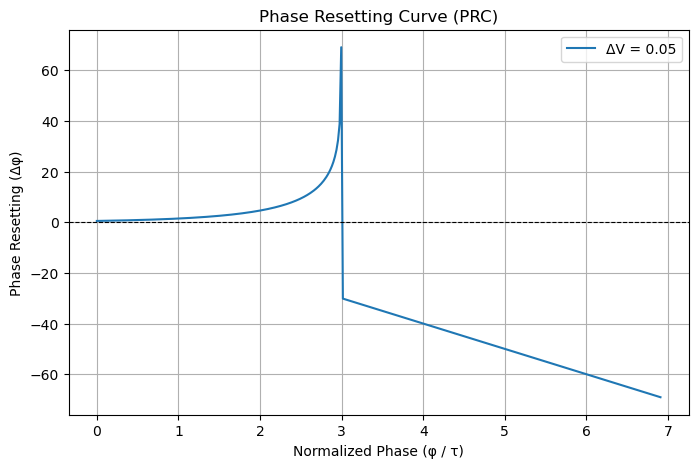

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the leaky integrate-and-fire neuron
tau = 10.0  
I = 1.2  
V_reset = 0  
V_threshold = 1  #
dt = 0.01 
t_max = 100 

#Associate a phase with each value of V
#Solve the leaky integrate-and-fire equation analytically
def membrane_potential(t, tau, I):
    """Membrane potential V(t) as a function of time."""
    return 1 - np.exp(-t / tau)

# Invert the function to get phase phi as a function of V
def phase_from_voltage(V, tau, I):
    """Phase as a function of membrane potential V."""
    return -tau * np.log(1 - V)

# Determine the change in V after a current pulse
def apply_pulse(V, delta_V):
    """Apply a small perturbation to the membrane potential."""
    return V + delta_V

#Compute the PRC
def calculate_prc(tau, I, delta_V):
    """Calculate the phase resetting curve (PRC)."""
    # Time points to sample for the PRC
    V_values = np.linspace(0, V_threshold, 1000)[:-1]  # Avoid hitting V_threshold
    phi_values = phase_from_voltage(V_values, tau, I)
    delta_phi_values = []

    for V in V_values:
        # Apply a small perturbation delta_V at this voltage
        V_perturbed = apply_pulse(V, delta_V)

        # Check if perturbation exceeds the threshold
        if V_perturbed >= V_threshold:
            # Spike occurs immediately; phase reset to zero
            phi_prime = 0
        else:
            # Calculate new phase after perturbation
            phi_prime = phase_from_voltage(V_perturbed, tau, I)

        # Calculate phase change
        delta_phi = phi_prime - phase_from_voltage(V, tau, I)
        delta_phi_values.append(delta_phi)

    return V_values, phi_values, delta_phi_values

# Parameters for perturbation
delta_V = 0.05  # Small perturbation in voltage

# Calculate the PRC
V_values, phi_values, delta_phi_values = calculate_prc(tau, I, delta_V)

# Plot the PRC
plt.figure(figsize=(8, 5))
plt.plot(phi_values / tau, delta_phi_values, label=f'ΔV = {delta_V}')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.xlabel('Normalized Phase (φ / τ)')
plt.ylabel('Phase Resetting (Δφ)')
plt.title('Phase Resetting Curve (PRC)')
plt.legend()
plt.grid(True)
plt.show()


## Assignment 2b)

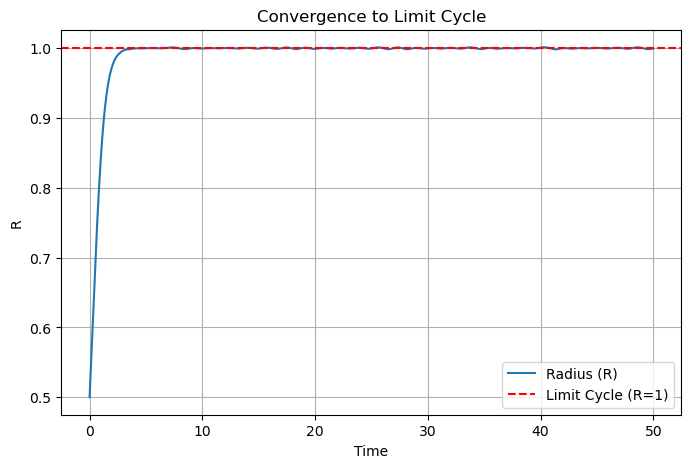

Asymptotic Phase for initial (R, phi) = [0.8, 0]: 99.88328939737183
PRC (Δφ) for ΔR = 0.1: 0.06389090724810842


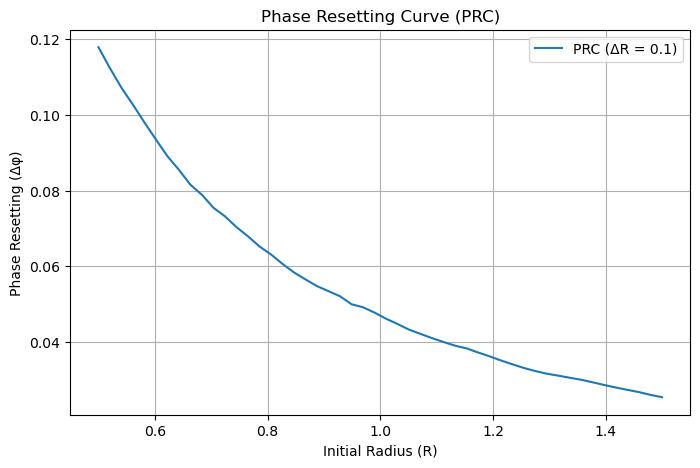

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# System parameters
def system(t, y):
    R, phi = y
    dR_dt = (1 - R**2) * R  # Radial equation
    dphi_dt = R  # Angular equation
    return [dR_dt, dphi_dt]

# Numerical simulation of the system
def simulate_system(initial_conditions, t_span, dt=0.01):
    t = np.arange(t_span[0], t_span[1], dt)
    sol = solve_ivp(system, t_span, initial_conditions, t_eval=t, method='RK45')
    return sol.t, sol.y

# Step 1: Visualize the limit cycle
t_span = [0, 50]
initial_conditions = [0.5, 0]  # Initial (R, phi) away from the limit cycle
t, y = simulate_system(initial_conditions, t_span)

# Extract results
R, phi = y

# Plot the radial component over time
plt.figure(figsize=(8, 5))
plt.plot(t, R, label="Radius (R)")
plt.axhline(1, color='red', linestyle='--', label="Limit Cycle (R=1)")
plt.xlabel("Time")
plt.ylabel("R")
plt.title("Convergence to Limit Cycle")
plt.legend()
plt.grid()
plt.show()

# Step 2: Compute the asymptotic phase
# Map the phase of the initial conditions onto the limit cycle
def asymptotic_phase(R, phi):
    # Integrate the system to let R approach 1
    t_span = [0, 100]
    sol = solve_ivp(system, t_span, [R, phi], method='RK45')
    R_final, phi_final = sol.y[:, -1]
    return phi_final  # Asymptotic phase on the limit cycle

# Phase calculation example
initial_conditions = [0.8, 0]
asym_phase = asymptotic_phase(initial_conditions[0], initial_conditions[1])
print(f"Asymptotic Phase for initial (R, phi) = {initial_conditions}: {asym_phase}")

# Step 3: Apply a delta pulse and determine PRC
def apply_pulse_and_calculate_prc(delta_R, initial_conditions):
    R, phi = initial_conditions

    # Apply the pulse to R
    R_pulsed = R + delta_R

    # Calculate asymptotic phases before and after the pulse
    asym_phase_original = asymptotic_phase(R, phi)
    asym_phase_pulsed = asymptotic_phase(R_pulsed, phi)

    # PRC: Change in phase
    delta_phi = asym_phase_pulsed - asym_phase_original
    return delta_phi

# Example: Apply a pulse and compute PRC
delta_R = 0.1
initial_conditions = [0.8, 0]
delta_phi = apply_pulse_and_calculate_prc(delta_R, initial_conditions)
print(f"PRC (Δφ) for ΔR = {delta_R}: {delta_phi}")

# Step 4: Plot PRC for a range of initial conditions
initial_R_values = np.linspace(0.5, 1.5, 50)  # Test different initial radii
delta_phi_values = [apply_pulse_and_calculate_prc(delta_R, [R, 0]) for R in initial_R_values]

plt.figure(figsize=(8, 5))
plt.plot(initial_R_values, delta_phi_values, label=f"PRC (ΔR = {delta_R})")
plt.xlabel("Initial Radius (R)")
plt.ylabel("Phase Resetting (Δφ)")
plt.title("Phase Resetting Curve (PRC)")
plt.legend()
plt.grid()
plt.show()
